Example semistructured (hierarchical) data processing (json) with pyspark

look at `shows/` folder
*  information about TV shows. eg. Silicon Valley

In [1]:
from pyspark.sql import SparkSession, DataFrame
import pyspark.sql.functions as F

In [2]:
spark = SparkSession.builder.getOrCreate()

JSON
* JavaScript Object Notation
* https://json.org
* a JSON object has keys and values. The top-level object in a JSON document is called the root object or element. Keys are always strings, and values can take numerical, Boolean, string, or null values. You can also have arrays of elements or objects as values, which enables nesting and hierarchical organization of the data.

In [3]:
import json

In [5]:
sample_json = """
{
    "id": 143,
    "name": "Silicon Valley",
    "type": "Scripted",
    "language": "English",
    "genres": [
        "Comedy"
    ],
    "network": {
        "id": 8,
        "name": "HBO",
        "country": {
            "name": "United States",
            "code": "US",
            "timezone": "America/New_York"
        }
    }
}
"""

In [6]:
# Reading a simple JSON document as a Python dictionary
document = json.loads(sample_json)

In [7]:
document

{'id': 143,
 'name': 'Silicon Valley',
 'type': 'Scripted',
 'language': 'English',
 'genres': ['Comedy'],
 'network': {'id': 8,
  'name': 'HBO',
  'country': {'name': 'United States',
   'code': 'US',
   'timezone': 'America/New_York'}}}

In [9]:
type(document)

dict

In [11]:
using_GoogleColab = True
if using_GoogleColab:
  # to work with files inside Google Colab,
  from google.colab import drive
  drive.mount('/content/drive')
  # and right-click copy path of the files you want
else:
  # idk man
  pass

Mounted at /content/drive


In [12]:
from pathlib import Path

reading a single json document

In [13]:
dir_path = Path("drive/MyDrive/Colab Notebooks/shows")
file_path = dir_path / "shows-silicon-valley.json"

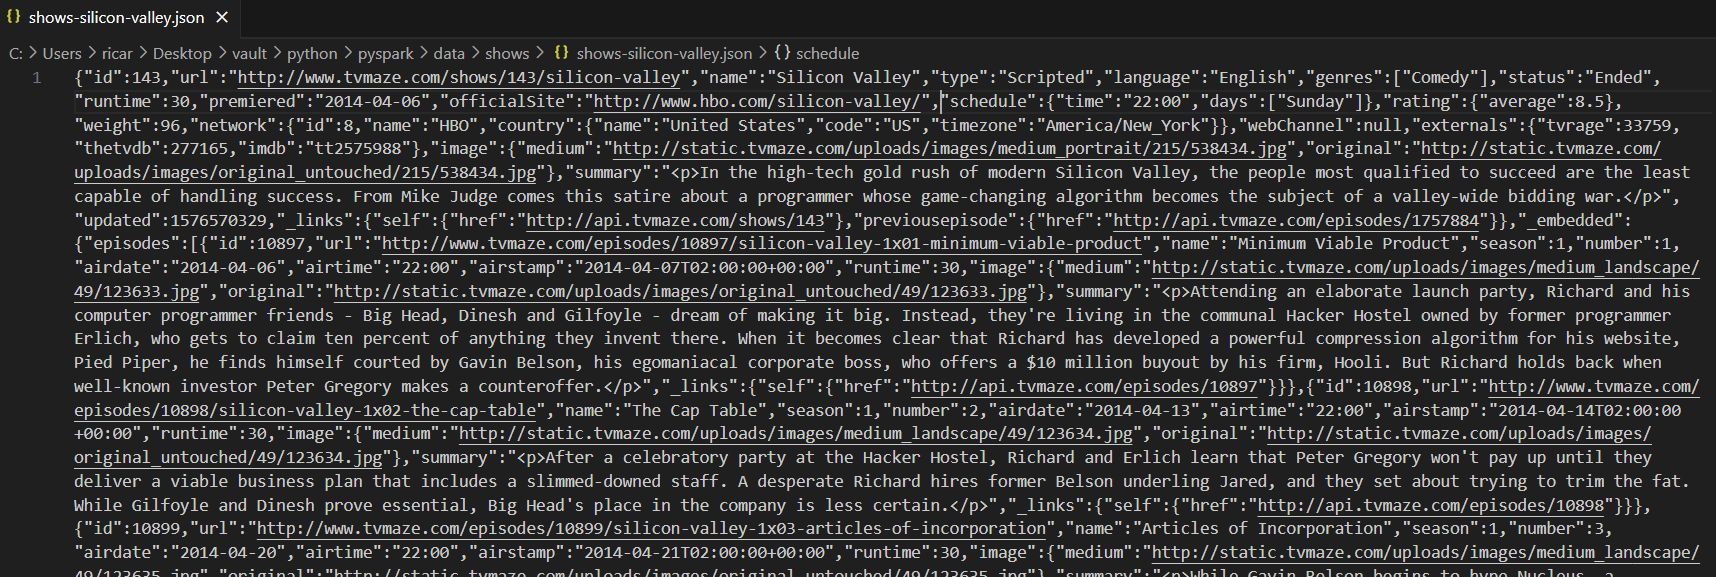

In [18]:
from IPython.display import Code

In [19]:
Code(filename = file_path, language = 'json')

{"id":143,"url":"http://www.tvmaze.com/shows/143/silicon-valley","name":"Silicon Valley","type":"Scripted","language":"English","genres":["Comedy"],"status":"Ended","runtime":30,"premiered":"2014-04-06","officialSite":"http://www.hbo.com/silicon-valley/","schedule":{"time":"22:00","days":["Sunday"]},"rating":{"average":8.5},"weight":96,"network":{"id":8,"name":"HBO","country":{"name":"United States","code":"US","timezone":"America/New_York"}},"webChannel":null,"externals":{"tvrage":33759,"thetvdb":277165,"imdb":"tt2575988"},"image":{"medium":"http://static.tvmaze.com/uploads/images/medium_portrait/215/538434.jpg","original":"http://static.tvmaze.com/uploads/images/original_untouched/215/538434.jpg"},"summary":"<p>In the high-tech gold rush of modern Silicon Valley, the people most qualified to succeed are the least capable of handling success. From Mike Judge comes this satire about a programmer whose game-changing algorithm becomes the subject of a valley-wide bidding war.</p>","updated":1576570329,"_links":{"self":{"href":"http://api.tvmaze.com/shows/143"},"previousepisode":{"href":"http://api.tvmaze.com/episodes/1757884"}},"_embedded":{"episodes":[{"id":10897,"url":"http://www.tvmaze.com/episodes/10897/silicon-valley-1x01-minimum-viable-product","name":"Minimum Viable Product","season":1,"number":1,"airdate":"2014-04-06","airtime":"22:00","airstamp":"2014-04-07T02:00:00+00:00","runtime":30,"image":{"medium":"http://static.tvmaze.com/uploads/images/medium_landscape/49/123633.jpg","original":"http://static.tvmaze.com/uploads/images/original_untouched/49/123633.jpg"},"summary":"<p>Attending an elaborate launch party, Richard and his computer programmer friends - Big Head, Dinesh and Gilfoyle - dream of making it big. Instead, they're living in the communal Hacker Hostel owned by former programmer Erlich, who gets to claim ten percent of anything they invent there. When it becomes clear that Richard has developed a powerful compression algorithm for his website, Pied Piper, he finds himself courted by Gavin Belson, his egomaniacal corporate boss, who offers a $10 million buyout by his firm, Hooli. But Richard holds back when well-known investor Peter Gregory makes a counteroffer.</p>","_links":{"self":{"href":"http://api.tvmaze.com/episodes/10897"}}},{"id":10898,"url":"http://www.tvmaze.com/episodes/10898/silicon-valley-1x02-the-cap-table","name":"The Cap Table","season":1,"number":2,"airdate":"2014-04-13","airtime":"22:00","airstamp":"2014-04-14T02:00:00+00:00","runtime":30,"image":{"medium":"http://static.tvmaze.com/uploads/images/medium_landscape/49/123634.jpg","original":"http://static.tvmaze.com/uploads/images/original_untouched/49/123634.jpg"},"summary":"<p>After a celebratory party at the Hacker Hostel, Richard and Erlich learn that Peter Gregory won't pay up until they deliver a viable business plan that includes a slimmed-downed staff. A desperate Richard hires former Belson underling Jared, and they set about trying to trim the fat. While Gilfoyle and Dinesh prove essential, Big Head's place in the company is less certain.</p>","_links":{"self":{"href":"http://api.tvmaze.com/episodes/10898"}}},{"id":10899,"url":"http://www.tvmaze.com/episodes/10899/silicon-valley-1x03-articles-of-incorporation","name":"Articles of Incorporation","season":1,"number":3,"airdate":"2014-04-20","airtime":"22:00","airstamp":"2014-04-21T02:00:00+00:00","runtime":30,"image":{"medium":"http://static.tvmaze.com/uploads/images/medium_landscape/49/123635.jpg","original":"http://static.tvmaze.com/uploads/images/original_untouched/49/123635.jpg"},"summary":"<p>While Gavin Belson begins to hype Nucleus, a competing compression platform, Richard learns that the name Pied Piper is already registered to a sprinkler company, forcing him to negotiate. Meanwhile, Erlich goes on a vision quest for a new company name, and Peter Gregory proves elusive when one of his companies asks for money.</p>","_links":{"self":{"href":"http://api.tvmaze.com/episodes/1089

In [14]:
shows = spark.read.json(str(file_path))

In [15]:
shows.count()

1

In [17]:
shows.show()

+--------------------+--------------------+--------------------+--------+---+--------------------+--------+--------------+--------------------+--------------------+----------+------+-------+-----------------+------+--------------------+--------+----------+--------------------+----------+------+
|           _embedded|              _links|           externals|  genres| id|               image|language|          name|             network|        officialSite| premiered|rating|runtime|         schedule|status|             summary|    type|   updated|                 url|webChannel|weight|
+--------------------+--------------------+--------------------+--------+---+--------------------+--------+--------------+--------------------+--------------------+----------+------+-------+-----------------+------+--------------------+--------+----------+--------------------+----------+------+
|{[{{{http://api.t...|{{http://api.tvma...|{tt2575988, 27716...|[Comedy]|143|{http://static.tv...| English|Silic

In [25]:
shows.printSchema()

root
 |-- _embedded: struct (nullable = true)
 |    |-- episodes: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- _links: struct (nullable = true)
 |    |    |    |    |-- self: struct (nullable = true)
 |    |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |-- airdate: string (nullable = true)
 |    |    |    |-- airstamp: string (nullable = true)
 |    |    |    |-- airtime: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- image: struct (nullable = true)
 |    |    |    |    |-- medium: string (nullable = true)
 |    |    |    |    |-- original: string (nullable = true)
 |    |    |    |-- name: string (nullable = true)
 |    |    |    |-- number: long (nullable = true)
 |    |    |    |-- runtime: long (nullable = true)
 |    |    |    |-- season: long (nullable = true)
 |    |    |    |-- summary: string (nullable = true)
 |    |    |    |-- url: string (nullable = true

In this schema we have columns of type:
* StructType
* ArrayType
* and basic data types like StringType and LongType

In [28]:
shows.columns

['_embedded',
 '_links',
 'externals',
 'genres',
 'id',
 'image',
 'language',
 'name',
 'network',
 'officialSite',
 'premiered',
 'rating',
 'runtime',
 'schedule',
 'status',
 'summary',
 'type',
 'updated',
 'url',
 'webChannel',
 'weight']

reading multiple json documents

In [21]:
file_path = dir_path / "shows-*.json"

In [23]:
three_shows = spark.read.json(str(file_path), multiLine=True)

In [24]:
three_shows.count()

3

In [26]:
three_shows.printSchema()

root
 |-- _embedded: struct (nullable = true)
 |    |-- episodes: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- _links: struct (nullable = true)
 |    |    |    |    |-- self: struct (nullable = true)
 |    |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |-- airdate: string (nullable = true)
 |    |    |    |-- airstamp: string (nullable = true)
 |    |    |    |-- airtime: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- image: struct (nullable = true)
 |    |    |    |    |-- medium: string (nullable = true)
 |    |    |    |    |-- original: string (nullable = true)
 |    |    |    |-- name: string (nullable = true)
 |    |    |    |-- number: long (nullable = true)
 |    |    |    |-- runtime: long (nullable = true)
 |    |    |    |-- season: long (nullable = true)
 |    |    |    |-- summary: string (nullable = true)
 |    |    |    |-- url: string (nullable = true

the array (ArrayType) column type

In [29]:
# Selecting the name and genres columns
array_subset = shows.select("name", "genres")

In [32]:
array_subset.show()

+--------------+--------+
|          name|  genres|
+--------------+--------+
|Silicon Valley|[Comedy]|
+--------------+--------+



In [59]:
from pyspark.sql.types import ArrayType

In [54]:
# Access the data type of a specific column

if isinstance(shows.schema["genres"].dataType, ArrayType):
    print("The 'genres' column is an ArrayType.")
else:
    print("The 'genres' column is not an ArrayType.")

The 'genres' column is an ArrayType.


In [34]:
three_shows.select("name", "genres").show(truncate=False)

+----------------+------------------------+
|name            |genres                  |
+----------------+------------------------+
|The Golden Girls|[Drama, Comedy]         |
|Breaking Bad    |[Drama, Crime, Thriller]|
|Silicon Valley  |[Comedy]                |
+----------------+------------------------+



In [35]:
import pyspark.sql.functions as F

In [38]:
# Extracting elements from an array

three_shows.select(
"name",

# 4 ways of doing the same thing
three_shows.genres[0].alias("dot_and_index"),
F.col("genres")[0].alias("col_and_index"),
three_shows.genres.getItem(0).alias("dot_and_method"),
F.col("genres").getItem(0).alias("col_and_method"),

).show()

+----------------+-------------+-------------+--------------+--------------+
|            name|dot_and_index|col_and_index|dot_and_method|col_and_method|
+----------------+-------------+-------------+--------------+--------------+
|The Golden Girls|        Drama|        Drama|         Drama|         Drama|
|    Breaking Bad|        Drama|        Drama|         Drama|         Drama|
|  Silicon Valley|       Comedy|       Comedy|        Comedy|        Comedy|
+----------------+-------------+-------------+--------------+--------------+



In [40]:
three_shows.select(
"name",
F.lit("Comedy").alias("one"),
F.lit("Horror").alias("two"),
F.lit("Drama").alias("three"),
).show()

# lit() - Creates a pyspark.sql.Column of literal value

+----------------+------+------+-----+
|            name|   one|   two|three|
+----------------+------+------+-----+
|The Golden Girls|Comedy|Horror|Drama|
|    Breaking Bad|Comedy|Horror|Drama|
|  Silicon Valley|Comedy|Horror|Drama|
+----------------+------+------+-----+



In [49]:
res: DataFrame = three_shows.select(
"name",
F.lit("Comedy").alias("one"),
F.lit("Horror").alias("two"),
F.lit("Drama").alias("three"),
).select(
"name",
F.array("one", "two", "three").alias("Some_Genres"),
F.array_repeat("one", 5).alias("Repeated_Genres"),
)

res.show(truncate=False)

# array() - Creates a new array column
# array_repeat() - Collection function: creates an array containing a column repeated count times

+----------------+-----------------------+----------------------------------------+
|name            |Some_Genres            |Repeated_Genres                         |
+----------------+-----------------------+----------------------------------------+
|The Golden Girls|[Comedy, Horror, Drama]|[Comedy, Comedy, Comedy, Comedy, Comedy]|
|Breaking Bad    |[Comedy, Horror, Drama]|[Comedy, Comedy, Comedy, Comedy, Comedy]|
|Silicon Valley  |[Comedy, Horror, Drama]|[Comedy, Comedy, Comedy, Comedy, Comedy]|
+----------------+-----------------------+----------------------------------------+



In [53]:
res.select(
"name",
F.size("Some_Genres"),
F.size("Repeated_Genres"),
F.array_distinct("Some_Genres"),
F.array_distinct("Repeated_Genres"),
).show(truncate=False)

+----------------+-----------------+---------------------+---------------------------+-------------------------------+
|name            |size(Some_Genres)|size(Repeated_Genres)|array_distinct(Some_Genres)|array_distinct(Repeated_Genres)|
+----------------+-----------------+---------------------+---------------------------+-------------------------------+
|The Golden Girls|3                |5                    |[Comedy, Horror, Drama]    |[Comedy]                       |
|Breaking Bad    |3                |5                    |[Comedy, Horror, Drama]    |[Comedy]                       |
|Silicon Valley  |3                |5                    |[Comedy, Horror, Drama]    |[Comedy]                       |
+----------------+-----------------+---------------------+---------------------------+-------------------------------+



The map (MapType) column type

In [55]:
data = [
    ("Alice", {"math": 85, "science": 90}),
    ("Bob", {"math": 78, "english": 88}),
    ("Charlie", {"history": 92}),
]

In [56]:
from pyspark.sql.types import StructType, StructField, MapType, StringType, IntegerType

In [65]:
# import convention
import pyspark.sql.types as T

In [57]:
# Define the schema with MapType

schema = StructType([
    StructField("name", StringType(), True),
    StructField("subjects", MapType(StringType(), IntegerType()), True),
])

In [58]:
df = spark.createDataFrame(data, schema)
df.show(truncate=False)
df.printSchema()

+-------+---------------------------+
|name   |subjects                   |
+-------+---------------------------+
|Alice  |{science -> 90, math -> 85}|
|Bob    |{english -> 88, math -> 78}|
|Charlie|{history -> 92}            |
+-------+---------------------------+

root
 |-- name: string (nullable = true)
 |-- subjects: map (nullable = true)
 |    |-- key: string
 |    |-- value: integer (valueContainsNull = true)



In [66]:
df.select("name", df["subjects"]["math"].alias("math_score")).show()

+-------+----------+
|   name|math_score|
+-------+----------+
|  Alice|        85|
|    Bob|        78|
|Charlie|      NULL|
+-------+----------+



The struct (StructType) column type

In [60]:
three_shows.select("schedule").printSchema()

root
 |-- schedule: struct (nullable = true)
 |    |-- days: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- time: string (nullable = true)



In [61]:
shows.select("_embedded").printSchema()

root
 |-- _embedded: struct (nullable = true)
 |    |-- episodes: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- _links: struct (nullable = true)
 |    |    |    |    |-- self: struct (nullable = true)
 |    |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |-- airdate: string (nullable = true)
 |    |    |    |-- airstamp: string (nullable = true)
 |    |    |    |-- airtime: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- image: struct (nullable = true)
 |    |    |    |    |-- medium: string (nullable = true)
 |    |    |    |    |-- original: string (nullable = true)
 |    |    |    |-- name: string (nullable = true)
 |    |    |    |-- number: long (nullable = true)
 |    |    |    |-- runtime: long (nullable = true)
 |    |    |    |-- season: long (nullable = true)
 |    |    |    |-- summary: string (nullable = true)
 |    |    |    |-- url: string (nullable = true

In [62]:
# Promoting the fields within a struct as column
shows_clean = shows.withColumn(
"episodes", F.col("_embedded.episodes")
).drop("_embedded")

shows_clean.printSchema() # this removes "_embedded"

root
 |-- _links: struct (nullable = true)
 |    |-- previousepisode: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- self: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |-- externals: struct (nullable = true)
 |    |-- imdb: string (nullable = true)
 |    |-- thetvdb: long (nullable = true)
 |    |-- tvrage: long (nullable = true)
 |-- genres: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- id: long (nullable = true)
 |-- image: struct (nullable = true)
 |    |-- medium: string (nullable = true)
 |    |-- original: string (nullable = true)
 |-- language: string (nullable = true)
 |-- name: string (nullable = true)
 |-- network: struct (nullable = true)
 |    |-- country: struct (nullable = true)
 |    |    |-- code: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- timezone: string (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- name: string (nul

In [63]:
# Selecting a field in an Array[Struct] to create a column
episodes_name = shows_clean.select(F.col("episodes.name"))
episodes_name.printSchema()

root
 |-- name: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [64]:
episodes_name.select(F.explode("name").alias("name")).show(3, False)

+-------------------------+
|name                     |
+-------------------------+
|Minimum Viable Product   |
|The Cap Table            |
|Articles of Incorporation|
+-------------------------+
only showing top 3 rows



In [67]:
three_shows.columns

['_embedded',
 '_links',
 'externals',
 'genres',
 'id',
 'image',
 'language',
 'name',
 'network',
 'officialSite',
 'premiered',
 'rating',
 'runtime',
 'schedule',
 'status',
 'summary',
 'type',
 'updated',
 'url',
 'webChannel',
 'weight']

In [68]:
three_shows.printSchema()

root
 |-- _embedded: struct (nullable = true)
 |    |-- episodes: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- _links: struct (nullable = true)
 |    |    |    |    |-- self: struct (nullable = true)
 |    |    |    |    |    |-- href: string (nullable = true)
 |    |    |    |-- airdate: string (nullable = true)
 |    |    |    |-- airstamp: string (nullable = true)
 |    |    |    |-- airtime: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- image: struct (nullable = true)
 |    |    |    |    |-- medium: string (nullable = true)
 |    |    |    |    |-- original: string (nullable = true)
 |    |    |    |-- name: string (nullable = true)
 |    |    |    |-- number: long (nullable = true)
 |    |    |    |-- runtime: long (nullable = true)
 |    |    |    |-- season: long (nullable = true)
 |    |    |    |-- summary: string (nullable = true)
 |    |    |    |-- url: string (nullable = true

Examples...

Genres distribution - Visualize how many shows belong to each genre.
* Explode the genres array
* Count the occurrences of each genre
* Plot a bar chart

In [69]:
import pyspark.sql.functions as F
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# Explode genres array to get each genre as a separate row
genres_df = three_shows.select(F.explode(F.col("genres")).alias("genre"))
genre_counts = genres_df.groupBy("genre").count().orderBy(F.col("count").desc())

In [71]:
# Convert to Pandas for visualization
genre_counts_pd = genre_counts.toPandas()

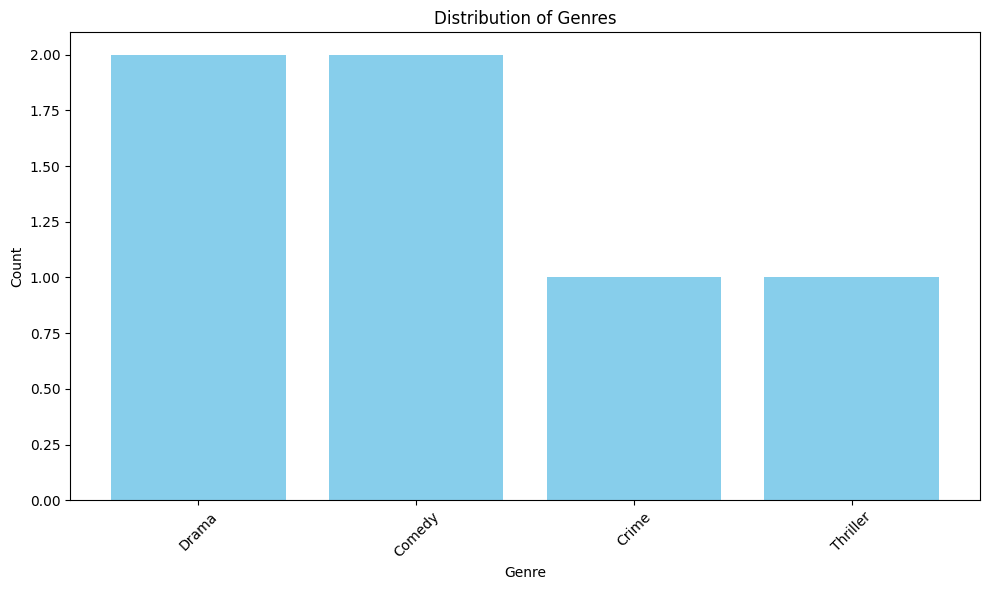

In [72]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_pd['genre'], genre_counts_pd['count'], color='skyblue')
plt.title("Distribution of Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average rating of shows - Visualize the average ratings of the three shows.
* Extract the name and rating.average columns.
* Plot the results as a bar chart.

In [73]:
ratings_df = three_shows.select("name", F.col("rating.average").alias("average_rating"))

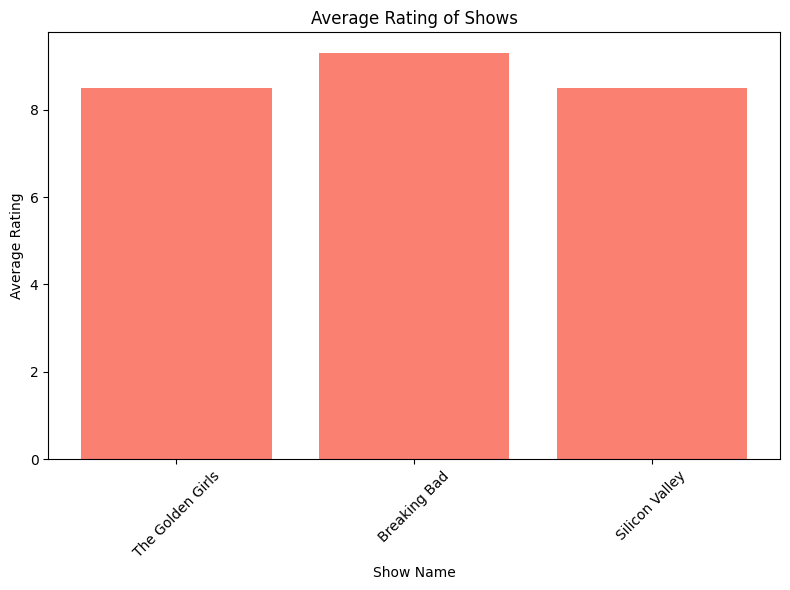

In [74]:
ratings_pd = ratings_df.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(ratings_pd['name'], ratings_pd['average_rating'], color='salmon')
plt.title("Average Rating of Shows")
plt.xlabel("Show Name")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Runtime distribution - Visualize the runtime of the shows to see their typical length
* Extract the runtime column
* Plot a histogram

In [75]:
runtime_df = three_shows.select("runtime")

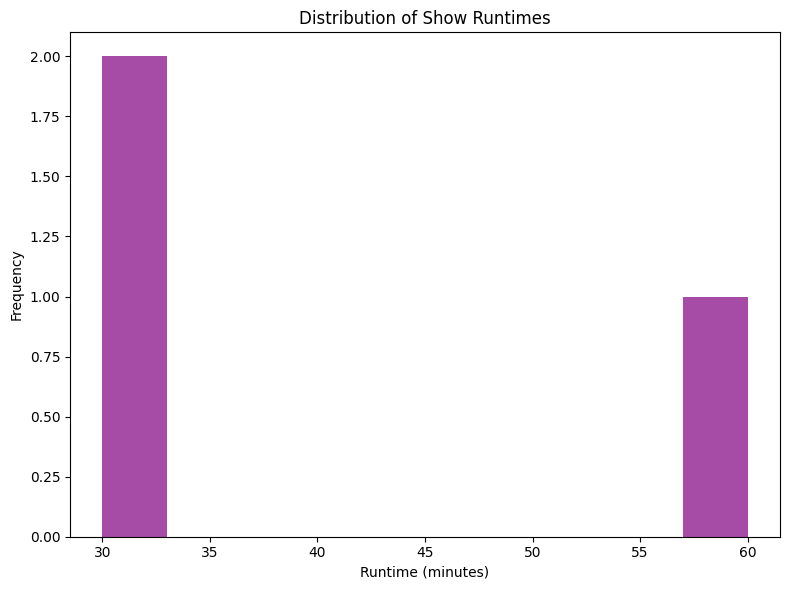

In [76]:
runtime_pd = runtime_df.toPandas()

plt.figure(figsize=(8, 6))
plt.hist(runtime_pd['runtime'], bins=10, color='purple', alpha=0.7)
plt.title("Distribution of Show Runtimes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Premiere years of shows - Visualize how many shows premiered in different years.
* Extract the premiered column and split it to get the year.
* Count the shows for each year.
* Plot a line chart.

In [78]:
# Extract premiere year
premiere_year_df = three_shows.select(F.year(F.to_date(F.col("premiered"))).alias("premiere_year"))
premiere_year_counts = premiere_year_df.groupBy("premiere_year").count().orderBy("premiere_year")

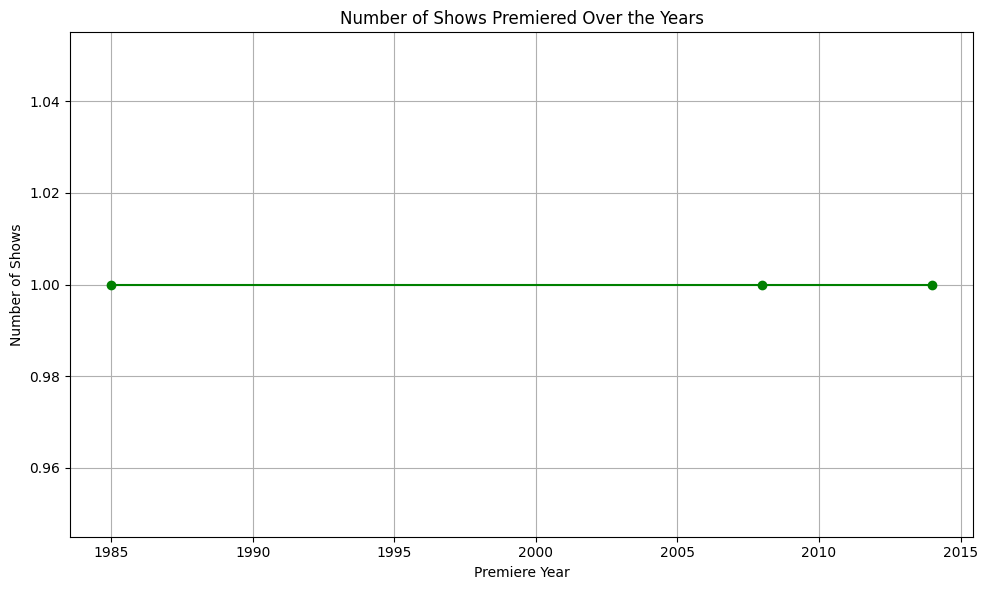

In [79]:
premiere_year_counts_pd = premiere_year_counts.toPandas()

plt.figure(figsize=(10, 6))
plt.plot(premiere_year_counts_pd['premiere_year'], premiere_year_counts_pd['count'], marker='o', linestyle='-', color='green')
plt.title("Number of Shows Premiered Over the Years")
plt.xlabel("Premiere Year")
plt.ylabel("Number of Shows")
plt.grid(True)
plt.tight_layout()
plt.show()

Network distribution - Visualize the number of shows for each network.
* Extract the network.name column
* Count occurrences of each network
* Plot a horizontal bar chart

In [80]:
# Extract network names
network_df = three_shows.select(F.col("network.name").alias("network"))
network_counts = network_df.groupBy("network").count().orderBy(F.col("count").desc())

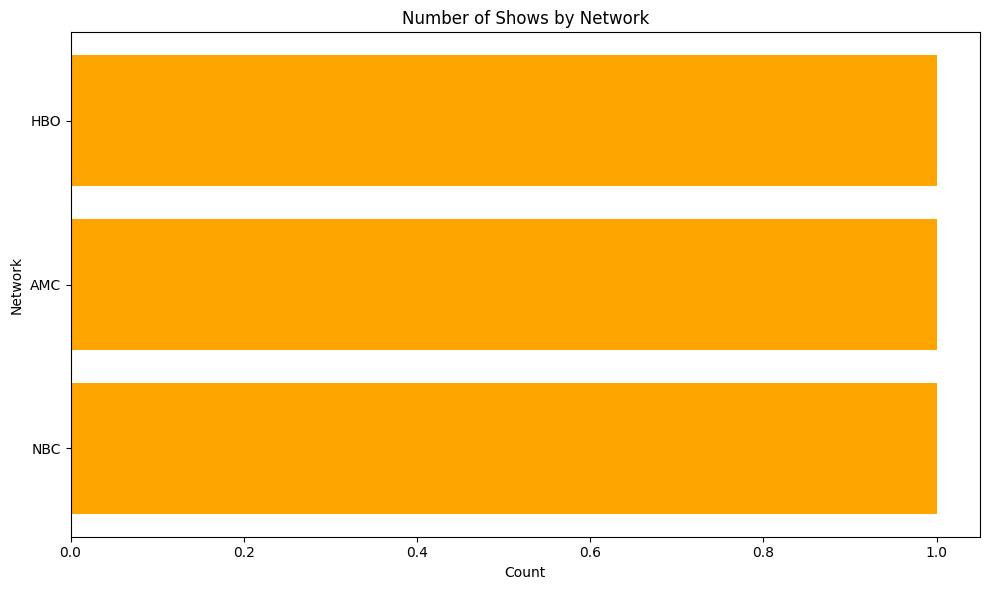

In [81]:
network_counts_pd = network_counts.toPandas()

plt.figure(figsize=(10, 6))
plt.barh(network_counts_pd['network'], network_counts_pd['count'], color='orange')
plt.title("Number of Shows by Network")
plt.xlabel("Count")
plt.ylabel("Network")
plt.tight_layout()
plt.show()